## Assignment 14

# Problem 7.27
Compare the trapezoid rule, Simpson’s rule, and Gauss–Legendre quadrature for $I_1, I_2$ and $I_3$.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoid(f,a,b,n):
  h = (b-a)/(n-1)
  xs = a + np.arange(n)*h
  cs = np.ones(n); cs[0] = 0.5; cs[-1] = 0.5
  contribs = cs*f(xs)
  return h*np.sum(contribs)

def simpson(f,a,b,n):
  h = (b-a)/(n-1)
  xs = a + np.arange(n)*h
  cs = 2*np.ones(n)
  cs[1::2] = 4; cs[0] = 1; cs[-1] = 1
  contribs = cs*f(xs)
  return (h/3)*np.sum(contribs)

def legendre(n,x):
  if n==0:
    val2 = 1.
    dval2 = 0.
  elif n==1:
    val2 = x
    dval2 = 1.
  else:
    val0 = 1.; val1 = x
    for j in range(1,n):
      val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
      val0, val1 = val1, val2
    dval2 = n*(val0-x*val1)/(1.-x**2)
  return val2, dval2

def legnewton(n,xold,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    val, dval = legendre(n,xold)
    xnew = xold - val/dval
    xdiff = xnew - xold
    if abs(xdiff/xnew) < tol:
      break
    xold = xnew
  else:
    xnew = None
  return xnew

def legroots(n):
  roots = np.zeros(n)
  npos = n//2
  for i in range(npos):
    xold = np.cos(np.pi*(4*i+3)/(4*n+2))
    root = legnewton(n,xold)
    roots[i] = -root
    roots[-1-i] = root
  return roots

def gauleg_params(n):
  xs = legroots(n)
  cs = 2/((1-xs**2)*legendre(n,xs)[1]**2)
  return xs, cs

def gauleg(f,a,b,n):
  xs, cs = gauleg_params(n)
  coeffp = 0.5*(b+a)
  coeffm = 0.5*(b-a)
  ts = coeffp + coeffm*xs
  contribs = cs*f(ts)
  return coeffm*np.sum(contribs)

(a) $$I_1 = \int_0^{2\pi} e^{\sin(2x)} dx$$

In [59]:
def f1(x):
  return np.exp(np.sin(2*x))

print('Using Trapezoidal rule:', trapezoid(f1, 0., 2*np.pi, 501))
print('Using Simpsons rule:', simpson(f1, 0., 2*np.pi, 501))
print('Using Gaussian-Quadrature:', gauleg(f1, 0., 2*np.pi, 501))

Using Trapezoidal rule: 7.954926521012846
Using Simpsons rule: 7.954926521012846
Using Gaussian-Quadrature: 7.954926520956014


(b) $$I_2 = \int_0^{2\pi} \frac{1}{2+\cos x} dx$$

In [60]:
def f2(x):
  return 1/(2+np.cos(x))

ans = (2*np.pi)/np.sqrt(3)
print('Answer:', ans)
print('Using Trapezoidal rule:', trapezoid(f2, 0., 2*np.pi, 501))
print('Using Simpsons rule:', simpson(f2, 0., 2*np.pi, 501))
print('Using Gaussian-Quadrature:', gauleg(f2, 0., 2*np.pi, 501))

Answer: 3.6275987284684357
Using Trapezoidal rule: 3.627598728468436
Using Simpsons rule: 3.6275987284684357
Using Gaussian-Quadrature: 3.6275987284494913


(b) $$I_3 = \int_{-1}^{1} e^{-x^2/2} dx$$

In [61]:
def f3(x):
  return np.exp(-x**2/2)

print('Using Trapezoidal rule:', trapezoid(f3, -1,1, 501))
print('Using Simpsons rule:', simpson(f3,-1,1, 501))
print('Using Gaussian-Quadrature:', gauleg(f3, -1,1, 501))

Using Trapezoidal rule: 1.7112471663683424
Using Simpsons rule: 1.7112487837877481
Using Gaussian-Quadrature: 1.7112487837733252


In all these cases the trapezoidal results are quite close to the other values. This could be due to a multitude of reasons - (a) we are using a significantly high number of panels, i.e. smaller $h$ making the algoritm more accurate (b) the functions itself are quite close to linear (with no extreme slope changes) in the range of integration. Since trapezoidal rule is exact for linear functions, our results are also quite similar.

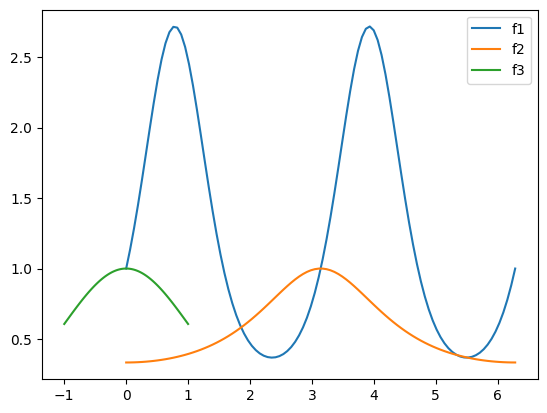

In [65]:
x1 = np.linspace(0, 2*np.pi, 100)
x3 = np.linspace(-1,1, 100)
plt.plot(x1, f1(x1), label='f1')
plt.plot(x1, f2(x1), label='f2')
plt.plot(x3, f3(x3), label='f3')
plt.legend()

## Problem 10.36

Diatomic molecules such as N$_2$ can be modeled as harmonic oscillators, that is, masses connected by a spring (see figure). Their vibrational motion is described by the following wave equation:

$$\frac{d^2\psi_{vib}}{dx^2} + \frac{8\pi^2m_R}{h^2}(\epsilon_{vib} - 2\pi^2v^2m_Rx^2)\psi_{vib} = 0$$

where $\psi_{vib}$ is called the vibrational wavefunction, $x$ is the distance between the two atoms, $h = 6.62 \times 10^{-34} J\cdot s$ is Planck's constant, $m_R = 1.16235 \times 10^{-26} kg$ is the reduced mass of the N$_2$ molecule, $\epsilon_{vib} = hv(v+0.5)$ is the vibrational energy, $v = 6.89517 \times 10^{13} s^{-1}$ (or Hz), and $v = 0, 1, 2, 3, ...$ is an integer called the vibrational quantum number.

Solve the ODE for the vibrational wavefunction $\psi_{vib}$ for:

(a) $v = 0$, (b) $v = 1$, and (c) $v = 10$, with the boundary conditions: $\psi_{vib} \rightarrow 0$ as $x \rightarrow \pm \infty$. (Hint: Since such boundary conditions are impractical to implement numerically, take large enough positive and negative values of $x$ and set $\psi_{vib} = 0$ at these endpoints.) Make a plot of $\psi_{vib}$ versus $x$.


**Solution:** We can reduce this system two a two coupled first order ODEs. Let

$$
y_1(x) = \psi(x) \text{ and } y_2(x) = \psi'(x)\\
\implies \begin{bmatrix}y_1'(x)\\y_2'(x)\end{bmatrix} = \begin{bmatrix}y_2(x)\\-A(\epsilon-Bx^2)y_1(x)\end{bmatrix}
$$

where
$$
A = \frac{8\pi^2m_R}{h^2}\\
B = 2\pi^2v^2m_R
$$

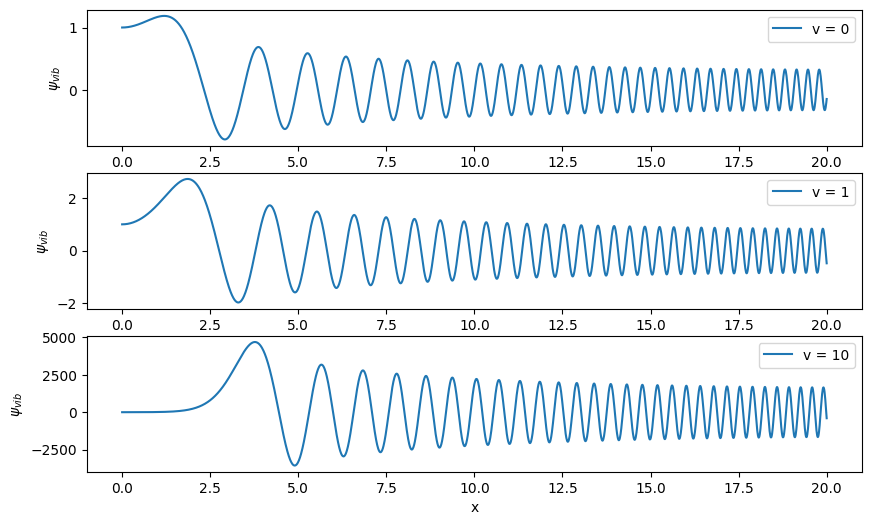

In [56]:
# (A) Solving a classical case of a similar ODE (with all physical constants  ~ 1)
import numpy as np
import matplotlib.pyplot as plt

k = 1

# vibrational energy function
def epsilon(v):
    return (v + 0.5)

def harmonic_oscillator(x, y, v):
   return np.array([y[1], (epsilon(v)-x**2)*y[0]])

initial_conditions = np.array([1, 0.0])
x_start = 0.0
x_end = 20
dx = 0.01

num_steps = int((x_end - x_start) / dx)
plt.figure(figsize=(10, 6))

j = 1
for v in [0, 1, 10]:
  rk2_results = np.zeros((num_steps + 1, 2))
  rk2_results[0] = initial_conditions

  for i in range(num_steps):

    x = x_start + i * dx
    y = rk2_results[i]

    k1 = dx * harmonic_oscillator(x, y, v)
    k2 = dx * harmonic_oscillator(x + dx, y + k1, v)
    rk2_results[i + 1] = y + (k1 + k2) / 2

  sols = rk2_results[:, 0]
  plt.subplot(310+j)
  j += 1
  plt.plot(np.linspace(x_start, x_end , len(sols)), sols, label=f'v = {v}')
  plt.legend()
  plt.ylabel(r'$\psi_{vib}$')

plt.xlabel('x')

plt.show()

<ipython-input-68-8bf8266eb494>:16: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([y[1], -A*(epsilon(v)-B*k*x**2)*y[0]])


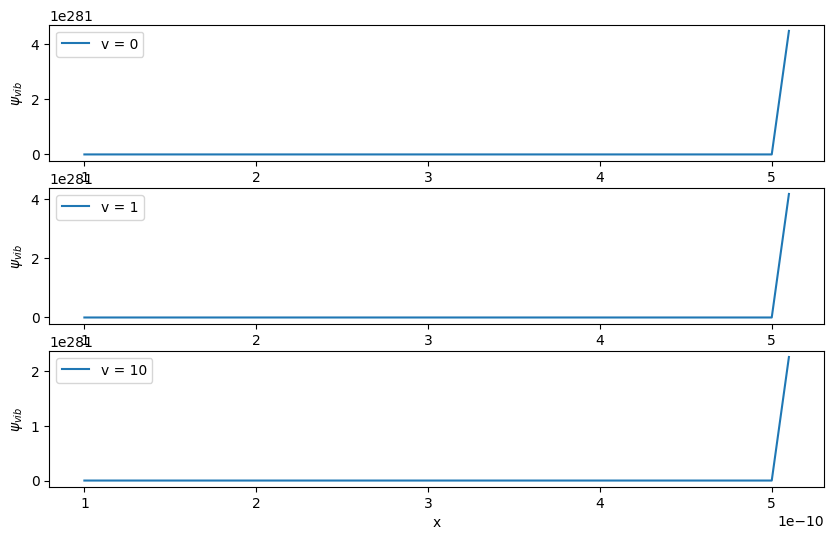

In [68]:
# (B) Solving with the constants put in
# but due to the values being too big, our algorithm runs into OverFlow error
import numpy as np
import matplotlib.pyplot as plt

h = 6.626e-34  # Planck's constant (J s)
m_R = 1.16235e-26  # Reduced mass of N2 (kg)
nu = 6.89517e13  # Vibrational frequency (Hz)
A = (8 * np.pi**2 * m_R / h**2)
B = (2 * np.pi**2 * nu**2 * m_R)

# vibrational energy function
def epsilon(v):
    return h * nu * (v + 0.5)

def harmonic_oscillator(x, y, v):
   return np.array([y[1], -A*(epsilon(v)-B*k*x**2)*y[0]])

initial_conditions = np.array([1e-10, 0.0])
x_start = 1e-10
x_end = 1e-9
dx = 1e-11

num_steps = int((x_end - x_start) / dx)
plt.figure(figsize=(10, 6))

j = 1
for v in [0, 1, 10]:
  rk2_results = np.zeros((num_steps + 1, 2))
  rk2_results[0] = initial_conditions

  for i in range(num_steps):

    x = x_start + i * dx
    y = rk2_results[i]

    # k1 = dx * harmonic_oscillator(x, y, v)
    # k2 = dx * harmonic_oscillator(x + dx, y + k1, v)
    # rk2_results[i + 1] = y + (k1 + k2) / 2

    k1 = dx * harmonic_oscillator(x, y, v)
    k2 = dx * harmonic_oscillator(x + dx/2, y + k1/2, v)
    k3 = dx * harmonic_oscillator(x + dx/2, y + k2/2, v)
    k4 = dx * harmonic_oscillator(x + dx, y + k3, v)
    rk2_results[i + 1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

  sols = rk2_results[:, 0]
  plt.subplot(310+j)
  j += 1
  plt.plot(np.linspace(x_start, x_end , len(sols)), sols, label=f'v = {v}')
  plt.legend()
  plt.ylabel(r'$\psi_{vib}$')

plt.xlabel('x')

plt.legend()
plt.show()